<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Classes and Generators

Hywel Owen  
(c) University of Manchester  
7th May 2020

![](./img/bee.png)
## Generating Random Numbers Using Classes and Generators

In this notebook we introduce and compare two programming constructs that are very useful to know. These are *classes* and *generators*:
* A class is a central feature of *object-oriented programming*, and is a feature of many programming langauges, including Python;
* A generator is a Python-specific construct that allows calculations to be done with effectively *persistent variables* and with much lower memory usage.

Here, we make a basic introduction to those two concepts using the programming problem of how to make a random number generator, which we saw in a separate example.

![](./img/bee.png)
## How To Make Pseudorandom Numbers

The 'random numbers' produced by computers are not generally really random at all, but are instead drawn from a *sequence*, i.e. term in the sequence is *uniquely* determined by the previous number in that sequence. The *seed* for that sequence is the initial value that generates all the following values. If the *expression* that generates each number in the sequence is sufficiently complex, then the sequence of numbers looks random. The important part is that the sequence of numbers should contain no *correlations* that might interfere with the calculations that those random numbers are being used for. For example, we woudn't want our sequence of numbers to pick out particular high points in the function we are trying to integrate.

The archetypal random number generator is the *linear congruential generator*, where each *sample* $x_{n+1}$ is defined in terms of the previous value $x_n$ in the sequence by 

$x_{n+1} = (a x_n + c) \mod m$,

where $a$ and $c$ are some chosen parameters and $m$ is another parameter known as the *modulus*.We also need a *seed* value $x_0$ which defines the first number in the sequence.

We see that the numbers which are generated lie between 0 and $m-1$. For convenience we scale those numbers by $1/m$ so that they lie in the open interval $[0,1)$. Our job then is to write some code that generates these numbers. We will do this here in 3 ways:
* A function
* A class
* A generator

### Pseudorandom numbers using a function

Python functions are straightforward to write. Here, we want to pass $a,c,m$ and the seed value as *arguments* to the function, and generate, say, $n$ values in the sequence. Here's a function that will do that:

In [11]:
import numpy as np

def lcgfunction(m,a,c,seed,n):
    x = seed # First value of x (not returned as one of the random numbers)
    random_set = [] # Empty array to store the random numbers
    for i in range(n):
        x = (a*x + c) % m # Calculate next random value
        random_set.append(x/m)
    return random_set

# Calculate 10 random numbers using the a,c,m value from Numerical Recipes
lcgfunction(2**32,1664525, 1013904223,1,10)

[0.23645552527159452,
 0.3692706737201661,
 0.5042420323006809,
 0.7048832636792213,
 0.05054362863302231,
 0.3695183543022722,
 0.7747629624791443,
 0.556188570568338,
 0.0164932357147336,
 0.6392460397910327]

This all seems great. But what if we want to call **lcgfunction** repeatedly, returning 1 value at a time? The problem here is that we don't have a way of keeping the present value of **x** stored within the function. Such so-called *persistent* variables are not available in Python - after a function is called, the variables used inside the function are discarded.

We could do it with a global variable, but this would be clunky and would defeat the point of having a function that can generate a single random variable. After all, that is what the command **numpy.random.random()** can do. We want to be able to generate any number of random values, at will. Let's see two ways in which we can do that.

### Pseudorandom values using a generator

Generators are a wonderful part of Python. With a small change of how a function is asked to return a value, we can get the beneftis of a persistent variable. This is done by using the keyword **yield**; each time **next** is used, it asks for the next value produced at the **yield** statement to be obtained. Our modified function can then be asked to generate as many values as we like, since the **while** loop has no termination in it. We can now generate values in the following way: 

In [14]:
def lcggenerator(m,a,c,seed):
    x = seed

    while True:
        x = (a * x + c) % m
        yield x/m

num_recipies_sampler = lcggenerator(2**32,1664525, 1013904223,1)
 
random_set = [next(num_recipies_sampler) for i in range(10)]    

print(random_set)

[0.23645552527159452, 0.3692706737201661, 0.5042420323006809, 0.7048832636792213, 0.05054362863302231, 0.3695183543022722, 0.7747629624791443, 0.556188570568338, 0.0164932357147336, 0.6392460397910327]


Notice that the returned values are the same as with the previous method. Now, we can more conveniently use those numbers to produce a set of samples:

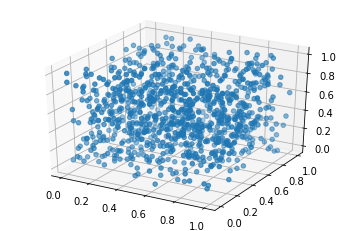

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
nrs = lcggenerator(2**32,1664525, 1013904223,1) # Initialise a random number generator
for i in range(1000):
    x.append(next(nrs))
    y.append(next(nrs))
    z.append(next(nrs))
    
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x,y,z)

### Pseudorandom values using a class

We won't worry right now about the more complicated features of a **class**. For now, let's summarise some basic ideas:
* A class describes a kind of *object* we can create.
* We can create an *instance* object of that class.
* Objects generally have both *properties* and *methods*. Properties are like variables, and methods are like functions.

First, let's define a class called **LCG** that defines a general linear congruential generator. By convention, classes in Python have names that begin with a capital letter:

In [1]:
class LCG:
    """
    A general linear congruential generator
    """
    def __init__(self, m, a, c):
        self.m = m
        self.a = a
        self.c = c
        self.seed = 0
        self.this_sample = self.seed # Set initial sequence value to be the seed
        # Can return the original seed value if we want to!
        
    def sample(self):
        # Generate the sample (between 0 and m)
        self.this_sample = (self.a * self.this_sample + self.c) % self.m
        # Return the sample (between 0 and 1)
        return self.this_sample/self.m
    
    # Allow the seed value to be set explicitly
    def set_seed(self, seed_val):
        self.seed = seed_val
        self.this_sample = self.seed

This class has the following things in it:
* There are 4 properties: **m**,**a**,**c** and **seed**.
* There are 2 methods: sample() and set_seed().
* There is also a special method called **init**.

We can create an *instance* by defining an object name:

In [2]:
numericalrecipes = LCG(2**32,1664525, 1013904223)

**numericalrecipes** is now an object (it looks much like a variable, doesn't it), and we can ask for its properties:

In [3]:
print(numericalrecipes.a)

1664525


When the object was created (*instantiated*), the method **init** was automatically run, which set these properties. We can then access the methods, importantly the one which generates samples (notice that methods have brackets at the end of them, because of some of them take arguments):

In [4]:
numericalrecipes.sample()

0.23606797284446657

Importantly, when each sample is generated an internal variable called **this_sample** is updated, and is maintained in the object. We can see this occurring by looking at its value:

In [7]:
print(numericalrecipes.sample())
print(numericalrecipes.this_sample)
print(numericalrecipes.sample())
print(numericalrecipes.this_sample)
print(numericalrecipes.this_sample)
print(numericalrecipes.this_sample)
print(numericalrecipes.this_sample)

0.6218074872158468
2670642822
0.3437259302008897
1476291629
1476291629
1476291629
1476291629


We can create different instances of the same class:

In [8]:
alison = LCG(2**32,1664525, 1013904223)
betty = LCG(2**32,1664525, 1013904223)

They can generate samples independently of each other, but will give exactly the same sequence of numbers:

In [9]:
print(alison.sample())
print(alison.sample())
print(alison.sample())
print(alison.sample())
print(alison.sample())
print(alison.sample())

0.23606797284446657
0.278566908556968
0.8195337599609047
0.6678668977692723
0.3840773708652705
0.6218074872158468


In [10]:
print(betty.sample())
print(betty.sample())
print(betty.sample())
print(betty.sample())
print(betty.sample())
print(betty.sample())

0.23606797284446657
0.278566908556968
0.8195337599609047
0.6678668977692723
0.3840773708652705
0.6218074872158468


And, as with the generator method above, we can produce sets of random numbers:

In [12]:
random_set = [alison.sample() for i in range(10)]    

print(random_set)

[0.6400356087833643, 0.5077781022991985, 0.5817975462414324, 0.7967254931572825, 0.7375655984506011, 0.6138289596419781, 0.8851160365156829, 0.006749239983037114, 0.5147507376968861, 0.7077328821178526]


We do have to be a little careful, as it's possible to make a mistake like this when trying to sample points in a 2D region:

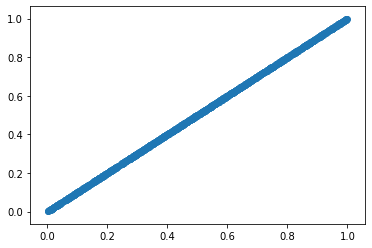

In [16]:
import matplotlib.pyplot as plt

x = []
y = []
z = []
xsampler = LCG(2**32,1664525, 1013904223)
ysampler = LCG(2**32,1664525, 1013904223)
for i in range(1000):
    x.append(xsampler.sample())
    y.append(ysampler.sample())
    
plt.scatter(x,y)

This is clearly totally wrong! Really, we should use one sampler:

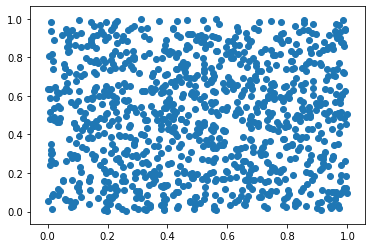

In [17]:
import matplotlib.pyplot as plt

x = []
y = []
z = []
onesampler = LCG(2**32,1664525, 1013904223)
for i in range(1000):
    x.append(onesampler.sample())
    y.append(onesampler.sample())
    
plt.scatter(x,y)

Or, we can fix it by changing the seed value of one of the ranodom number generators to something other than zero.

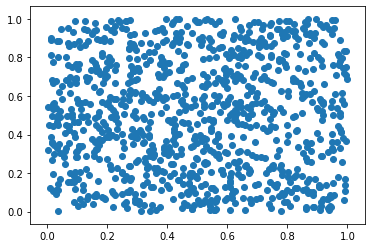

In [22]:
import matplotlib.pyplot as plt

x = []
y = []
z = []
xsampler = LCG(2**32,1664525, 1013904223)
ysampler = LCG(2**32,1664525, 1013904223)
ysampler.set_seed(71623)
for i in range(1000):
    x.append(xsampler.sample())
    y.append(ysampler.sample())
    
plt.scatter(x,y)